In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
# Loading data and sample them for test nad training sets
df_test = pd.read_csv("/Users/lippd/Desktop/ML in R/Python/Cars 0-1/data/cepik_dane_testowe.csv")
df_train = pd.read_csv("/Users/lippd/Desktop/ML in R/Python/Cars 0-1/data/cepik_dane_uczące.csv")

In [3]:
df_train = pd.concat([df_test, df_train])

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16014 entries, 0 to 8818
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mark       16014 non-null  object
 1   Model      16014 non-null  object
 2   Type       15130 non-null  object
 3   IsDeleted  16014 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.5+ KB


In [5]:
df_train.isnull().sum()

Mark           0
Model          0
Type         884
IsDeleted      0
dtype: int64

In [6]:
# view frequency of categorical variables
for var in df_train:
    print(df_train[var].value_counts())

MERCEDES-BENZ              2260
BMW                        2035
AUDI                        861
OPEL                        830
VOLKSWAGEN                  690
                           ... 
MATRA-RENAULT                 1
SAM                           1
AC                            1
MERCEDES-BENZ/AMZ-KUTNO       1
AUDI 4L                       1
Name: Mark, Length: 160, dtype: int64
---               46
JAZZ              26
307               23
FOCUS             22
MATIZ             20
                  ..
407 1.6 HDI SW     1
Q5 50 TFSI E       1
ALPINA B5          1
530 I              1
COMMANDER 3.7      1
Name: Model, Length: 6199, dtype: int64
---       10111
245 G        91
212          65
UKL-L        65
204          60
          ...  
0S            1
GMX511        1
TF69V         1
GMT926        1
C7            1
Name: Type, Length: 1003, dtype: int64
0    15196
1      818
Name: IsDeleted, dtype: int64


In [7]:
# view frequency distribution of categorical variables

for var in df_train:
    print(df_train[var].value_counts()/np.float(len(df_train)))

MERCEDES-BENZ              0.141127
BMW                        0.127076
AUDI                       0.053765
OPEL                       0.051830
VOLKSWAGEN                 0.043087
                             ...   
MATRA-RENAULT              0.000062
SAM                        0.000062
AC                         0.000062
MERCEDES-BENZ/AMZ-KUTNO    0.000062
AUDI 4L                    0.000062
Name: Mark, Length: 160, dtype: float64
---               0.002872
JAZZ              0.001624
307               0.001436
FOCUS             0.001374
MATIZ             0.001249
                    ...   
407 1.6 HDI SW    0.000062
Q5 50 TFSI E      0.000062
ALPINA B5         0.000062
530 I             0.000062
COMMANDER 3.7     0.000062
Name: Model, Length: 6199, dtype: float64
---       0.631385
245 G     0.005683
212       0.004059
UKL-L     0.004059
204       0.003747
            ...   
0S        0.000062
GMX511    0.000062
TF69V     0.000062
GMT926    0.000062
C7        0.000062
Name: Type, Leng

<ipython-input-7-889ec5e9e678>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df_train[var].value_counts()/np.float(len(df_train)))


In [8]:
# get dummies from categorical variables

pd.get_dummies(df_train.Mark.unique(), drop_first = True).head()

,ACURA,AIXAM,ALFA ROMEO,ALFA-ROMEO,ALPINA,ALPINE,AMZ-KUTNO,API CZ,ARIEL,ASIA,...,VOLKSWAGEN/V-VAN,VOLKSWAGEN/WALDI,VOLKSWAGEN/ZIMNY,VOLVO,VOSCO,WARMIAKI/MB SPRINTER,WARTBURG,WAZ,WSM-BIELSKO BIAŁA,ZHONGHUA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.get_dummies(df_train.Model.unique(), drop_first = True, dummy_na= True).head()

,0MG67,1,1.1,1.1 LIMUZYNA,1.3,100,100 1.8,"100 2,6 KAT.",100 2.0,100 2.0 KAT,...,ZAFIRA-A 2.0 DTL,ZAFIRA-A 2.0 TDI,ZAFIRA-B,ZAFIRA-B 1.7 CDTI,ZAFIRA-B 1.8,ZAFIRA-C,ZDX,ZOE,ZX,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pd.get_dummies(df_train.Type.unique(), drop_first = True).head()

,0,0*****,002,003,0G-A,0S,0U,0U****,1,1 HXO-SE/AFN,...,"ZA1(EU,M)-TMG",ZC,ZE0,ZE1,"ZE1EE(EU,M)","ZE1HE(EU,M)",ZE2,ZF1,ZN,ZR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = pd.concat([ df_train['IsDeleted'],
                   pd.get_dummies(df_train.Mark, drop_first = True),
                   pd.get_dummies(df_train.Model, drop_first = True),
                   pd.get_dummies(df_train.Type, drop_first = True)], axis = 1)

In [12]:
x = df.drop(['IsDeleted'], axis=1)

y = df['IsDeleted']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Without class weight

In [ ]:
# train the logistic regression modeel on the training set with calss_weight - balanced
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', class_weight='balanced')

# fit the model
logreg.fit(x_train, y_train)

## Class weight Balanced

In [14]:
# train the logistic regression modeel on the training set with calss_weight - balanced
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', class_weight='balanced')

# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
logreg.predict_proba(x_test)[:,0]

array([0.78809276, 0.96586673, 0.92864695, ..., 0.89952387, 0.7175728 ,
       0.67897515])

In [17]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9735


In [18]:
# print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

In [19]:
cm

array([[3007,   34],
       [  51,  111]], dtype=int64)

The f1 score for the testing data: 0.7231270358306189


<AxesSubplot:>

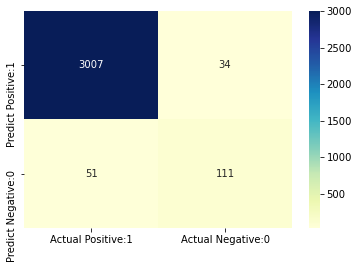

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, y_pred_test)
print('The f1 score for the testing data:', f1_test)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3041
           1       0.77      0.69      0.72       162

    accuracy                           0.97      3203
   macro avg       0.87      0.84      0.85      3203
weighted avg       0.97      0.97      0.97      3203



## Class weight manual calucalted

In [ ]:
# Calculating the class weights
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(solver = 'newton-cg')

# Setting the range for class weights
weights = np.linspace(0.0, 0.99, 10)

weights
# Creating a dictionary grid for grid search
#param_grid = {'class_weight':[{0:x, 1:1.0-x} for x in weights]}

param_grid
# Fitting frid seatch to the train data with 5 folds
#gridsearch = GridSearchCV(estimator = lr,
#                         param_grid = param_grid,
#                        cv = StratifiedKFold(),
#                         n_jobs = -1,
#                         scoring = 'f1',
#                         verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
weigh_data = pd.DataFrame({'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights', fontsize = 24)

In [40]:
#calculating weights
n_sample = df_train.shape[0]
n_classes = len(set(df_train['IsDeleted']))
n_sample_0 = df_train['IsDeleted'].value_counts()[0]
n_sample_1 = df_train['IsDeleted'].value_counts()[1]
w0 = n_sample/(n_classes*n_sample_0)
w1 = n_sample/(n_classes*n_sample_1)

In [48]:
w1 = n_sample_0/n_sample
w0 = 1 - w1

In [56]:
# train the logistic regression modeel on the training set with calss_weight - manual
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', class_weight={0: w0, 1: w1})

# fit the model
logreg.fit(x_train, y_train)

# predcit on the test data
pred_test_w = logreg.predict(x_test)

# calculatin and printing theee f1 score
f1_test = f1_score(y_test, pred_test_w)
print('The f1 score for thee testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test_w)

The f1 score for thee testing data: 0.2878980891719745


array([[2531,  510],
       [  49,  113]], dtype=int64)

In [ ]:
# So the best results we geet in the logistic reegression with balanced weights. I neeed to try calculate the manual wieghts but on this moment i do not have computer to calculate this.